In [105]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [106]:
#Mounting the drive to load the Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# Load data
combined_data = np.load("/content/drive/My Drive/Thesis_data/Master_integer.npy", allow_pickle=True)
# Separate features and labels
X = combined_data[:, :-1]
y = combined_data[:, -1] #Last column is the target variable

In [262]:
#Shape of the dataset
print(combined_data.shape)

#Shape of the training dataset X
print(X.shape) #It is flattened 13x13 extracted RAM arrays

#Shape of the target variable dataset
print(y.shape) #It contains single integer values obtained from converting the binary array(of the action)

(120224, 170)
(120224, 169)
(120224,)


In [110]:
# Extract unique integer labels
original_labels = np.unique(y)

# Create a mapping between integer labels and class indices which will be later used in classification as classes.
label_to_index = {label: index for index, label in enumerate(original_labels)}

# Create a mapping from class indices to original labels which will be later used to track the labels from the class index.
index_to_label = {index: label for label, index in label_to_index.items()}

# Replace labels with corresponding class indices
# Modifying the target variables for classification
y_categorical = np.array([label_to_index[label] for label in y])

In [146]:
print(original_labels)
print(label_to_index)

[   0    8   16   24   32   40   48   56   64   80  144 2048 2064 2072
 2080 2096]
{0: 0, 8: 1, 16: 2, 24: 3, 32: 4, 40: 5, 48: 6, 56: 7, 64: 8, 80: 9, 144: 10, 2048: 11, 2064: 12, 2072: 13, 2080: 14, 2096: 15}


In [115]:
# Determine the number of classes
num_classes = len(original_labels)

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [149]:
#observe the difference between the actual y and the converterd y
print(y[90]) #prints the actual value
print(y_categorical[90]) #prints the index

16
2


In [120]:
# Define model
#Softmax activation is commonly used in multi-class classification problems as it outputs a probability distribution over the classes.

model = Sequential([
    Flatten(input_shape=(X.shape[1],)),  # Input shape depends on the number of features
    Dense(100, activation='relu'),
    Dense(20, activation='relu'),
    Dense(40, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 169)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               17000     
                                                                 
 dense_13 (Dense)            (None, 20)                2020      
                                                                 
 dense_14 (Dense)            (None, 40)                840       
                                                                 
 dense_15 (Dense)            (None, 16)                656       
                                                                 
Total params: 20,516
Trainable params: 20,516
Non-trainable params: 0
_________________________________________________________________


In [121]:
#Stop if validation accuracy goes down, prevents overfitting
callback = tf.keras.callbacks.EarlyStopping(patience = 10)

# Compile model
# Sparse categorical cross-entropy loss function is commonly used for classification problems where the labels are integers.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=2, validation_data=(X_validation, y_validation))

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7214/7214 - 21s - loss: 0.9550 - accuracy: 0.7041 - val_loss: 0.8735 - val_accuracy: 0.7190 - 21s/epoch - 3ms/step
Epoch 2/150
7214/7214 - 17s - loss: 0.8415 - accuracy: 0.7311 - val_loss: 0.8343 - val_accuracy: 0.7309 - 17s/epoch - 2ms/step
Epoch 3/150
7214/7214 - 19s - loss: 0.8045 - accuracy: 0.7413 - val_loss: 0.8089 - val_accuracy: 0.7340 - 19s/epoch - 3ms/step
Epoch 4/150
7214/7214 - 19s - loss: 0.7827 - accuracy: 0.7447 - val_loss: 0.8028 - val_accuracy: 0.7391 - 19s/epoch - 3ms/step
Epoch 5/150
7214/7214 - 18s - loss: 0.7675 - accuracy: 0.7487 - val_loss: 0.7997 - val_accuracy: 0.7384 - 18s/epoch - 2ms/step
Epoch 6/150
7214/7214 - 17s - loss: 0.7572 - accuracy: 0.7514 - val_loss: 0.7910 - val_accuracy: 0.7421 - 17s/epoch - 2ms/step
Epoch 7/150
7214/7214 - 19s - loss: 0.7492 - accuracy: 0.7517 - val_loss: 0.7848 - val_accuracy: 0.7446 - 19s/epoch - 3ms/step
Epoch 8/150
7214/7214 - 17s - loss: 0.7424 - accuracy: 0.7547 - val_loss: 0.7843 - val_accuracy: 0.7430 - 17s/epoch - 2ms/s

In [122]:
tf.keras.models.save_model(model,'/content/drive/My Drive/Thesis_data/ANN_Final_I')

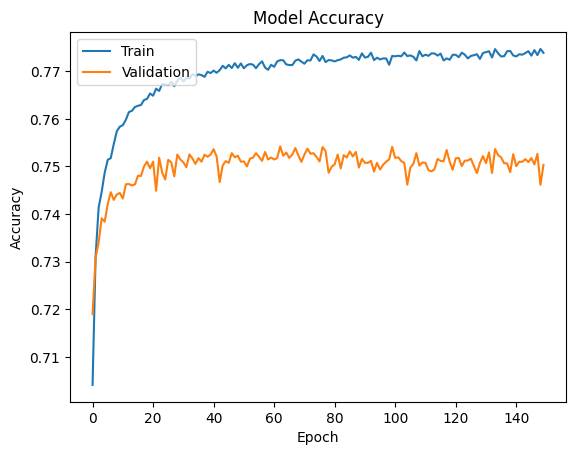

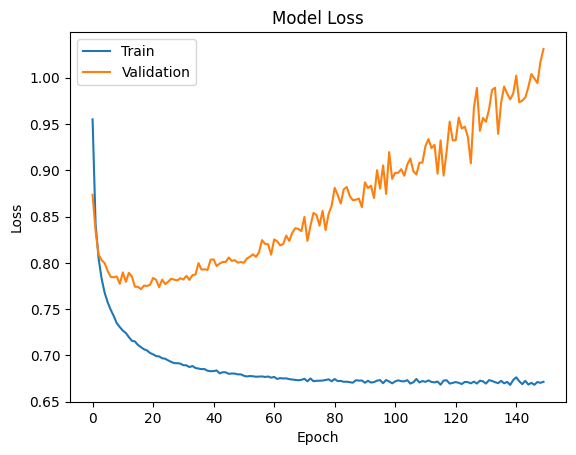

752/752 [==============================] - 4s 5ms/step - loss: 0.9425 - accuracy: 0.7576
Test Accuracy: 0.7575795650482178
Test Loss: 0.9425193071365356


In [123]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)

# Use the trained model to make a prediction about a single state.

In [277]:
Predict = np.load("/content/drive/My Drive/Thesis_data/State1_integer.npy", allow_pickle=True) #Sample data (same dimensions as the main dataset)
X_predict = Predict[:, :-1]
y_predict = Predict[:, -1]

single_state  = (np.expand_dims(X_predict[50],0)) # Add it to a batch where it's the only member.

In [278]:
print(X_predict[0].shape) #Intial shape of the state in the dataset
print(single_state.shape) #Desired state for the predictions using the model
single_predict = model.predict(single_state) #Predicting the output from the single state

(169,)
(1, 169)
1/1 [==============================] - 0s 25ms/step


In [279]:
index_single = np.argmax(single_predict) #Finding the label that has the highest confidence value
final_action_integer_single = index_to_label[index_single] #Converting the obtained index to the label
print(final_action_integer_single) #Print the action which is encoded to an integer

24


In [280]:
def integer_to_binary_array(integer_value, array_length=12):
    """
    Convert an integer to a binary array of specified length.
    Parameters:
        integer_value (int): The integer value to be converted.
        array_length (int): The desired length of the binary array.
    Returns:
        list: The binary array representing the integer value.
    """
    binary_string = format(integer_value, 'b')  # Convert integer to binary string
    binary_array = [int(bit) for bit in binary_string.zfill(array_length)]  # Pad with leading zeros if needed
    return binary_array

In [281]:
binary_data = integer_to_binary_array(final_action_integer_single) #Converting the action integer to the binary array which acts as the actual input to the game
print(binary_data)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
